### A/B Testing

A/B Testing means analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently. A/B testing is one of the valuable concepts that every Data Science professional should know.

In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

That is what A/B testing means. Your goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

For the task of A/B testing using Python, we need to have a dataset about two different marketing strategies for the same goal. I found a dataset that will help us perform A/B testing. You can download it from here: https://statso.io/a-b-testing-case-study/

### A/B testing using python

In [57]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
# read the control and test data
control_data = pd.read_csv("archive/control_group.csv", sep=";")
test_data = pd.read_csv("archive/test_group.csv", sep=";")

In [59]:
# let's have a look at both the datasets
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Let's give some new columnn name for ease of understanding and further processing.

In [61]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", 
                     "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

In [62]:
# check the dimensions of the datasets
print("Control Group:", control_data.shape)
print("Test Group:", test_data.shape)

Control Group: (30, 10)
Test Group: (30, 10)


In [63]:
# check the datatypes
control_data.dtypes

Campaign Name             object
Date                      object
Amount Spent               int64
Number of Impressions    float64
Reach                    float64
Website Clicks           float64
Searches Received        float64
Content Viewed           float64
Added to Cart            float64
Purchases                float64
dtype: object

In [64]:
test_data.dtypes

Campaign Name            object
Date                     object
Amount Spent              int64
Number of Impressions     int64
Reach                     int64
Website Clicks            int64
Searches Received         int64
Content Viewed            int64
Added to Cart             int64
Purchases                 int64
dtype: object

In [65]:
# descriptive statistics
control_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Campaign Name,30,1,Control Campaign,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,30,30,1.08.2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Spent,30.0,NaN,NaN,NaN,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
Number of Impressions,29.0,NaN,NaN,NaN,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,NaN,NaN,NaN,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
Website Clicks,29.0,NaN,NaN,NaN,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
Searches Received,29.0,NaN,NaN,NaN,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
Content Viewed,29.0,NaN,NaN,NaN,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
Added to Cart,29.0,NaN,NaN,NaN,1300.0,407.457973,442.0,930.0,1339.0,1641.0,1913.0
Purchases,29.0,NaN,NaN,NaN,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [66]:
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Campaign Name,30,1,Test Campaign,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,30,30,1.08.2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Spent,30.0,NaN,NaN,NaN,2563.066667,348.687681,1968.0,2324.5,2584.0,2836.25,3112.0
Number of Impressions,30.0,NaN,NaN,NaN,74584.8,32121.377422,22521.0,47541.25,68853.5,99500.0,133771.0
Reach,30.0,NaN,NaN,NaN,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
Website Clicks,30.0,NaN,NaN,NaN,6032.333333,1708.567263,3038.0,4407.0,6242.5,7604.75,8264.0
Searches Received,30.0,NaN,NaN,NaN,2418.966667,388.742312,1854.0,2043.0,2395.5,2801.25,2978.0
Content Viewed,30.0,NaN,NaN,NaN,1858.0,597.654669,858.0,1320.0,1881.0,2412.0,2801.0
Added to Cart,30.0,NaN,NaN,NaN,881.533333,347.584248,278.0,582.5,974.0,1148.5,1391.0
Purchases,30.0,NaN,NaN,NaN,521.233333,211.047745,238.0,298.0,500.0,701.0,890.0


In [67]:
# concise information
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount Spent           30 non-null     int64  
 3   Number of Impressions  29 non-null     float64
 4   Reach                  29 non-null     float64
 5   Website Clicks         29 non-null     float64
 6   Searches Received      29 non-null     float64
 7   Content Viewed         29 non-null     float64
 8   Added to Cart          29 non-null     float64
 9   Purchases              29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign Name          30 non-null     object
 1   Date                   30 non-null     object
 2   Amount Spent           30 non-null     int64 
 3   Number of Impressions  30 non-null     int64 
 4   Reach                  30 non-null     int64 
 5   Website Clicks         30 non-null     int64 
 6   Searches Received      30 non-null     int64 
 7   Content Viewed         30 non-null     int64 
 8   Added to Cart          30 non-null     int64 
 9   Purchases              30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [69]:
# duplicate records
control_data.duplicated().sum()

0

In [70]:
test_data.duplicated().sum()

0

In [71]:
# null/missing records
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [72]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column.

In [73]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), inplace=True)

In [74]:
# merge both the datasets
AB_Data = control_data.merge(test_data, how="outer").sort_values(["Date"]).reset_index(drop=True)
AB_Data.head()

d:\anaconda\envs\Deep_Learning\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [75]:
# campaign value counts
AB_Data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

#### A/B Testing to Find the Best Marketing Strategy

To get started with A/B testing, I will first analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:

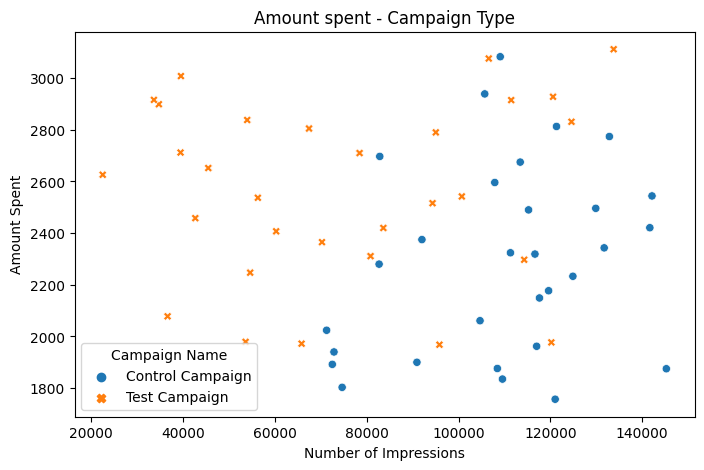

In [76]:
# Amount spent on both the campaigns
plt.figure(figsize=(8,5))
sns.scatterplot(x='Number of Impressions', y='Amount Spent', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Amount spent - Campaign Type')
plt.show()

The control campaign resulted in more impressions according to the amount spent on both campaigns. Now let’s have a look at the number of searches performed on the website from both campaigns:

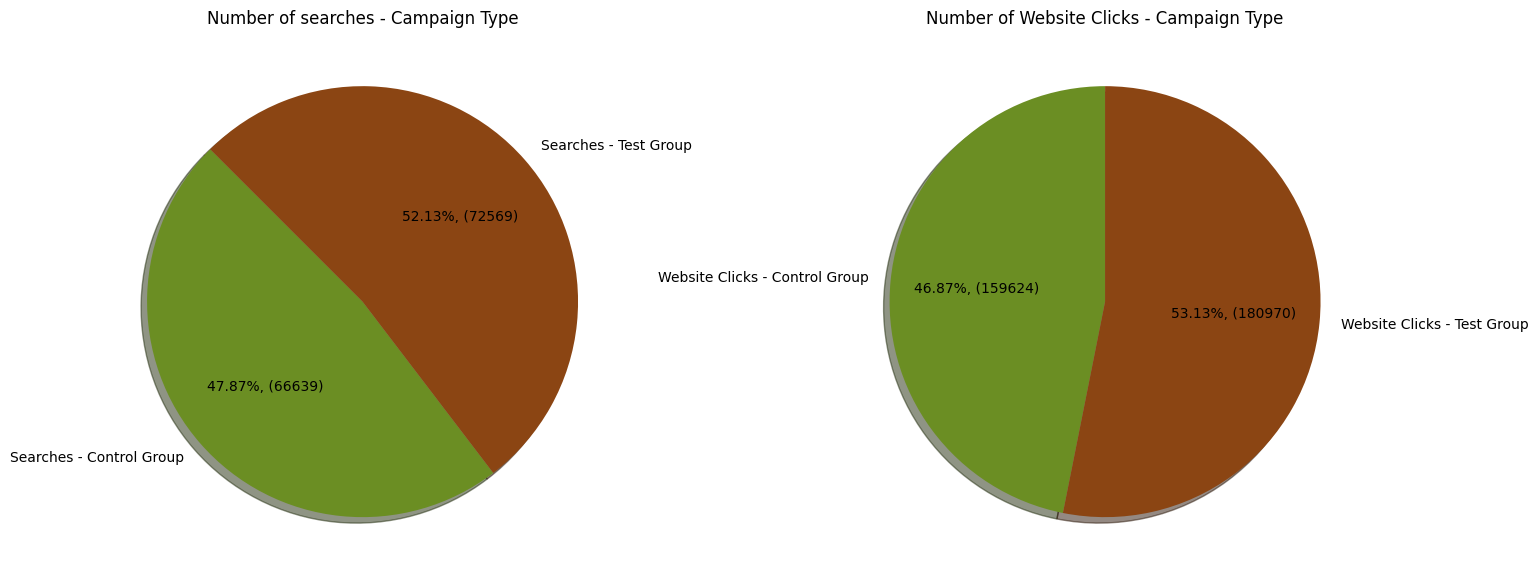

In [77]:
# Number of searches
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
labels = ["Searches - Control Group", "Searches - Test Group"]
sizes = [sum(control_data['Searches Received']), sum(test_data['Searches Received'])]

plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=135, shadow=True)
plt.title('Number of searches - Campaign Type')

# Number of website clicks
plt.subplot(1,2,2)
labels = ["Website Clicks - Control Group", "Website Clicks - Test Group"]
sizes = [sum(control_data['Website Clicks']), sum(test_data['Website Clicks'])]

plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Number of Website Clicks - Campaign Type')

plt.tight_layout()
plt.show()

The test campaign wins in the number of website clicks/searches recieved. Now let’s have a look at the amount of content viewed after reaching the website from both campaigns:

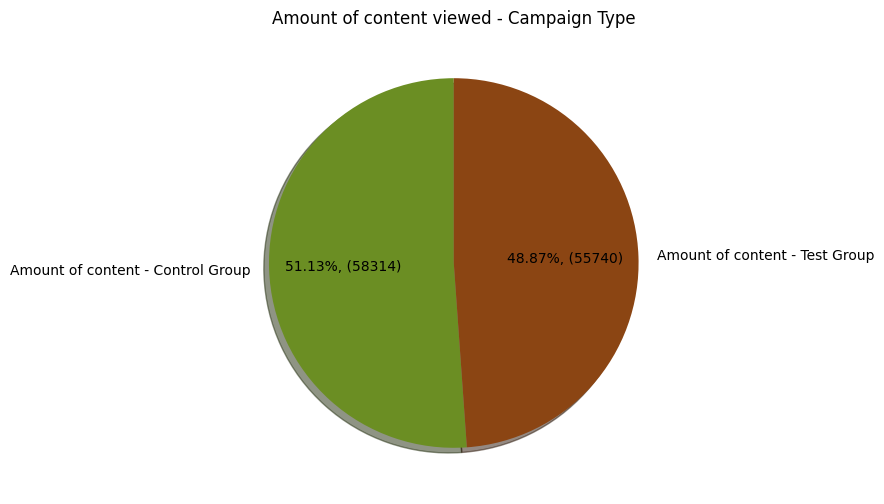

In [78]:
# Amount of content viewed
labels = ["Amount of content - Control Group", "Amount of content - Test Group"]
sizes = [sum(control_data['Content Viewed']), sum(test_data['Content Viewed'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Amount of content viewed - Campaign Type')
plt.show()

The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

Now let’s have a look at the number of products added to the cart from both campaigns:

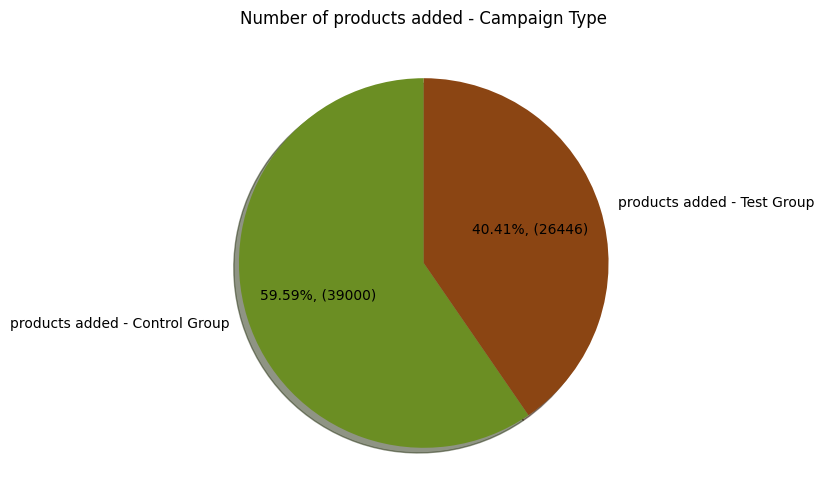

In [79]:
# Number of products added
labels = ["products added - Control Group", "products added - Test Group"]
sizes = [sum(control_data['Added to Cart']), sum(test_data['Added to Cart'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Number of products added - Campaign Type')
plt.show()

Despite low website clicks more products were added to the cart from the control campaign. Now let’s have a look at the amount spent on both campaigns:

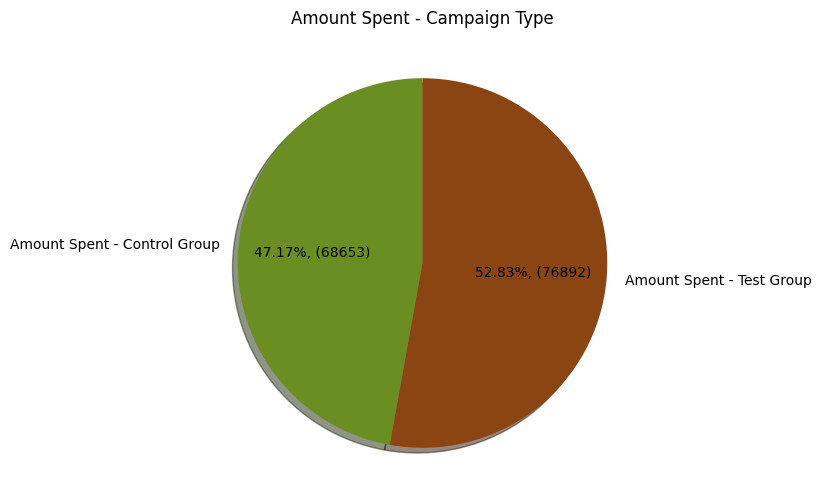

In [80]:
# Amount Spent
labels = ["Amount Spent - Control Group", "Amount Spent - Test Group"]
sizes = [sum(control_data['Amount Spent']), sum(test_data['Amount Spent'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Amount Spent - Campaign Type')
plt.show()

The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

Now let’s have a look at the purchases made by both campaigns:

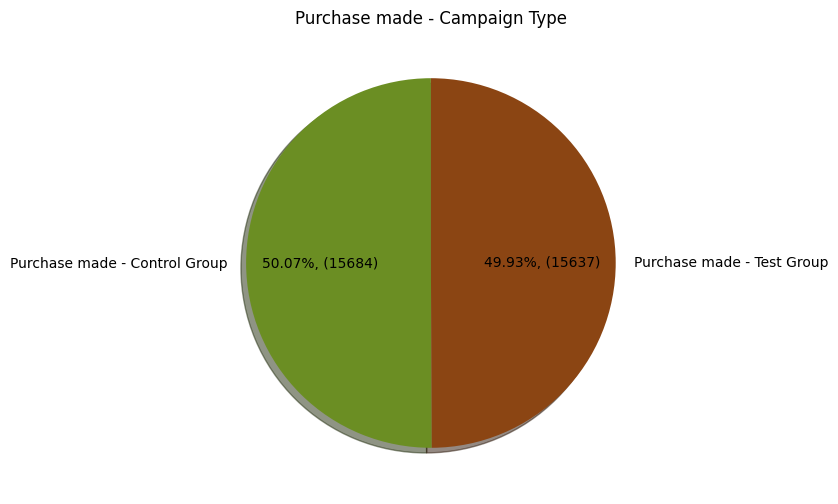

In [81]:
# Purchase made
labels = ["Purchase made - Control Group", "Purchase made - Test Group"]
sizes = [sum(control_data['Purchases']), sum(test_data['Purchases'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Purchase made - Campaign Type')
plt.show()

There’s only a difference of around 1% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here!

Now let’s analyze some metrics to find which ad campaign converts more. I will first look at the relationship between the number of website clicks and content viewed from both campaigns:

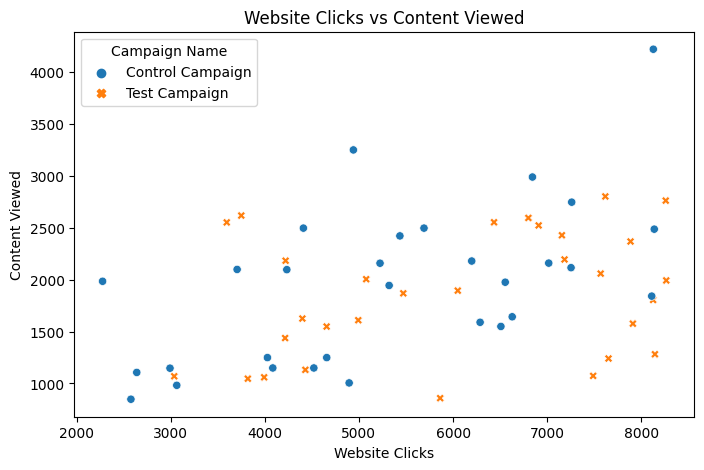

In [82]:
# Website Clicks vs Content Viewed
plt.figure(figsize=(8,5))
sns.scatterplot(x='Website Clicks', y='Content Viewed', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Website Clicks vs Content Viewed')
plt.show()

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

Now I will analyze the relationship between the amount of content viewed and the number of products added to the cart from both campaigns:

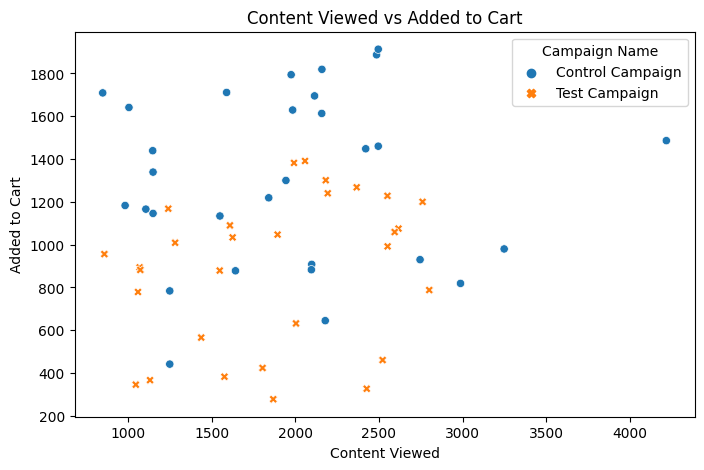

In [83]:
# Content Viewed vs Added to Cart
plt.figure(figsize=(8,5))
sns.scatterplot(x='Content Viewed', y='Added to Cart', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Content Viewed vs Added to Cart')
plt.show()

Again, the control campaign wins! Now let’s have a look at the relationship between the number of products added to the cart and the number of sales from both campaigns:

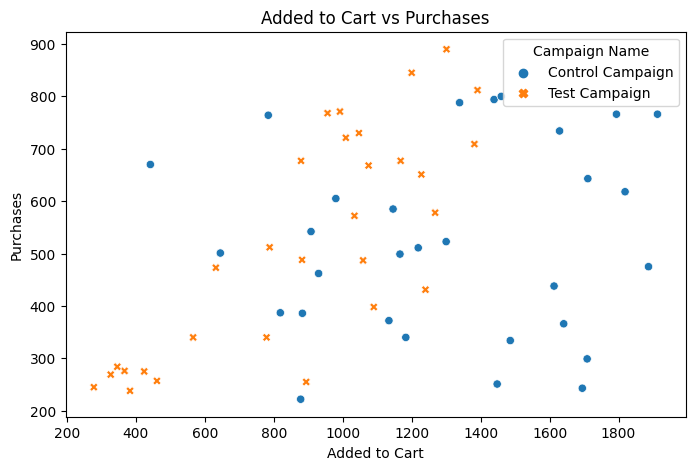

In [84]:
# Added to Cart vs Purchases
plt.figure(figsize=(8,5))
sns.scatterplot(x='Added to Cart', y='Purchases', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Added to Cart vs Purchases')
plt.show()

Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

#### Conclusion:
From the above A/B tests, we found that the Control Campaign resulted in more sales and engagement from the visitors. More products were viewed from the Control Campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the Test Campaign. The Test Campaign resulted in more sales according to the products viewed and added to the cart. And the Control Campaign results in more sales overall. So, the Test Campaign can be used to market a specific product to a specific audience, and the Control Campaign can be used to market multiple products to a wider audience.

### A/B Testing of Themes using Python

Many web platforms and applications perform A/B testing to run experiments to find the best design, layout, or themes for their platform. Instead of relying on assumptions or hunches, applications and websites can test different design variations on real-time users to measure their impact on user behaviour and metrics. By collecting and analyzing data, they can identify which design elements resonate most with users and optimize their offerings accordingly.

#### A/B Testing of Themes: Overview

A/B testing is a powerful and widely used Data Science technique to compare and evaluate marketing strategies, designs, layouts, or themes. The primary purpose of A/B testing is to make data-driven decisions that lead to improved user experiences, enhanced performance metrics, and ultimately better business outcomes.

Let’s say we have two themes, dark mode and light mode. A company wants to understand which theme looks the best on its website.

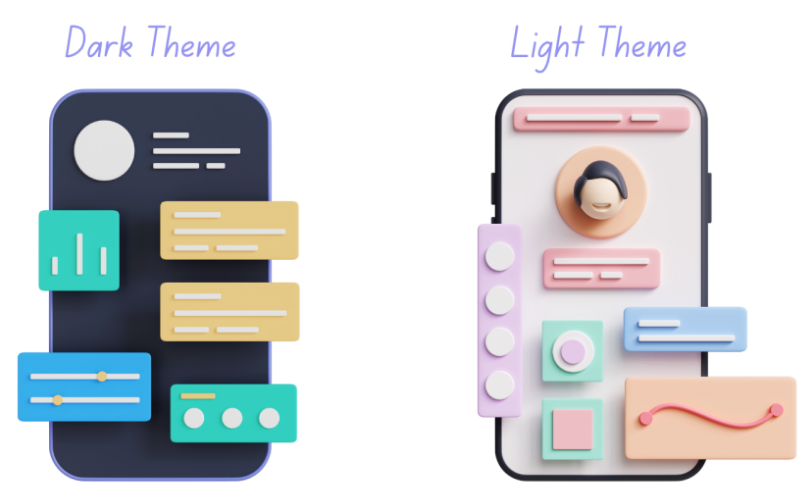

To understand which theme is better, the company can set a light theme as the default theme of the website for a certain period and collect data on how users interact with the website. Likewise, they can set a dark theme as the default theme for the same period and compare the user interaction data of both themes to find which theme resulted in better user interaction, purchases, signups, longer session duration, and more.

So for the task of A/B testing of themes, we need to have a dataset of user interaction data on two themes or design templates. I found an ideal dataset for this task. You can download the dataset from here: https://statso.io/light-theme-and-dark-theme-case-study/

In [85]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [86]:
# read the dataset
data = pd.read_csv("website_ab_test.csv")

# dimensions of data
data.shape

(1000, 10)

In [87]:
# let's look at few records from our data
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


#### dataset description:

 - Theme: dark or light
 - Click Through Rate: The proportion of the users who click on links or buttons on the website.
 - Conversion Rate: The percentage of users who signed up on the platform after visiting for the first time.
 - Bounce Rate: The percentage of users who leave the website without further interaction after visiting a single page.
 - Scroll Depth: The depth to which users scroll through the website pages.
 - Age: The age of the user.
 - Location: The location of the user.
 - Session Duration: The duration of the user’s session on the website.
 - Purchases: Whether the user purchased the book (Yes/No).
 - Added_to_Cart: Whether the user added books to the cart (Yes/No).

In [88]:
# datatypes
data.dtypes

Theme                  object
Click Through Rate    float64
Conversion Rate       float64
Bounce Rate           float64
Scroll_Depth          float64
Age                     int64
Location               object
Session_Duration        int64
Purchases              object
Added_to_Cart          object
dtype: object

In [89]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Theme,1000,2,Dark Theme,514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Click Through Rate,1000.0,NaN,NaN,NaN,0.256048,0.139265,0.010767,0.140794,0.253715,0.370674,0.499989
Conversion Rate,1000.0,NaN,NaN,NaN,0.253312,0.139092,0.010881,0.131564,0.252823,0.37304,0.498916
Bounce Rate,1000.0,NaN,NaN,NaN,0.505758,0.172195,0.20072,0.353609,0.514049,0.648557,0.799658
Scroll_Depth,1000.0,NaN,NaN,NaN,50.319494,16.895269,20.011738,35.655167,51.130712,64.666258,79.997108
Age,1000.0,NaN,NaN,NaN,41.528,14.114334,18.0,29.0,42.0,54.0,65.0
Location,1000,5,Chennai,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session_Duration,1000.0,NaN,NaN,NaN,924.999,508.231723,38.0,466.5,931.0,1375.25,1797.0
Purchases,1000,2,Yes,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Added_to_Cart,1000,2,Yes,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# concise information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [91]:
# duplicate records
data.duplicated().sum()

0

In [92]:
# null/missing records
data.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

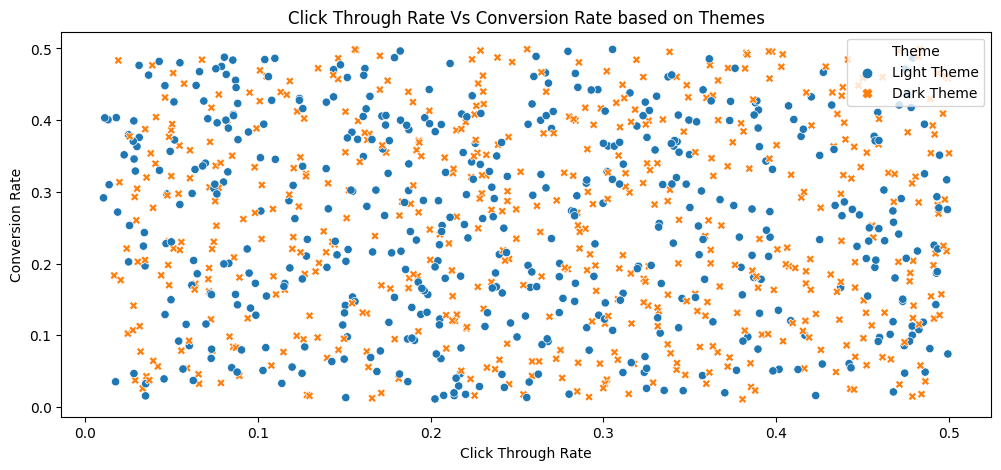

In [93]:
# Click Through Rate Vs Conversion Rate based on Themes
plt.figure(figsize=(12,5))
sns.scatterplot(x='Click Through Rate', y='Conversion Rate', data=data, style='Theme',hue='Theme')
plt.title('Click Through Rate Vs Conversion Rate based on Themes')
plt.show()

The relationship between the Click Through Rate (CTR) and Conversion Rate is consistent and nearly unchanged, as shown by the scatter plot. It means that as more users click on links or buttons (CTR increases), a similar proportion of them also end up signing up daily (Conversion Rate remains stable). In other words, the percentage of users who take the desired action of signing up remains roughly the same regardless of how many users initially clicked on links or buttons to explore the website.

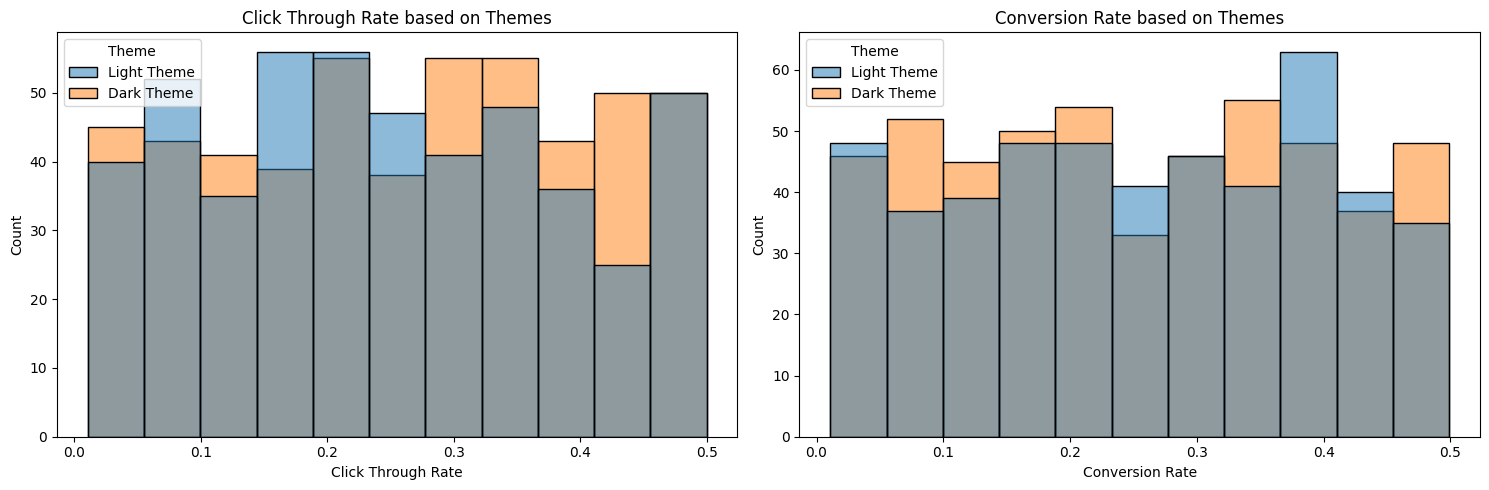

In [94]:
# Histogram of Click Through Rate Vs Conversion Rate based on Themes
plt.figure(figsize=(15,5))

# Click Through Rate based on Themes
ax1 = plt.subplot2grid((1,2), (0,0))

sns.histplot(x='Click Through Rate', data=data, hue='Theme', ax=ax1)
plt.title('Click Through Rate based on Themes')

# Conversion Rate based on Themes
ax2 = plt.subplot2grid((1,2), (0,1))

sns.histplot(x='Conversion Rate', data=data, hue='Theme', ax=ax2)
plt.title('Conversion Rate based on Themes')

plt.tight_layout()
plt.show()

We can see in the above histogram that there’s not much difference between the performance of both themes. Although there’s not much difference, the conversion rate of the dark theme is slightly better than the light theme.

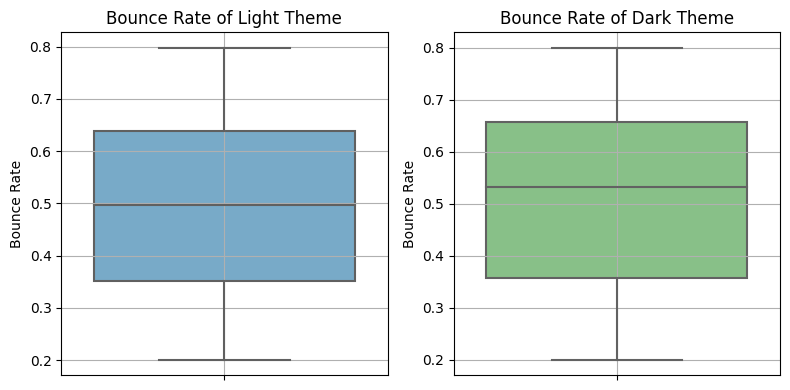

In [95]:
# Bounce Rate by Theme
plt.figure(figsize=(8,4))

# Bounce Rate of Light Theme
ax1 = plt.subplot2grid((1,2), (0,0))

sns.boxplot(y='Bounce Rate', data=data[data['Theme']=='Light Theme'], palette='Blues', ax=ax1)
plt.grid(True)
plt.title('Bounce Rate of Light Theme')

# Bounce Rate of Dark Theme
ax2 = plt.subplot2grid((1,2), (0,1))

sns.boxplot(y='Bounce Rate', data=data[data['Theme']=='Dark Theme'], palette='Accent', ax=ax2)
plt.grid(True)
plt.title('Bounce Rate of Dark Theme')

plt.tight_layout()
plt.show()

There’s not much difference between the bounce rates of both themes still, the bounce rate of the light theme is slightly lower (which means it’s slightly better).

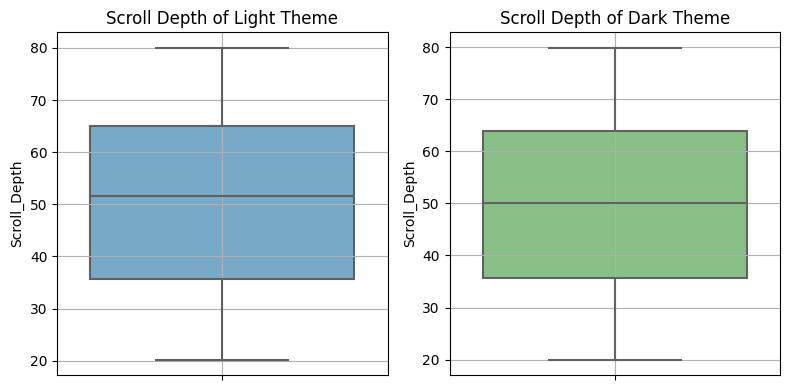

In [96]:
# Scroll Depth by Theme
plt.figure(figsize=(8,4))

# Scroll Depth of Light Theme
ax1 = plt.subplot2grid((1,2), (0,0))

sns.boxplot(y='Scroll_Depth', data=data[data['Theme']=='Light Theme'], palette='Blues', ax=ax1)
plt.grid(True)
plt.title('Scroll Depth of Light Theme')

# Scroll Depth of Dark Theme
ax2 = plt.subplot2grid((1,2), (0,1))

sns.boxplot(y='Scroll_Depth', data=data[data['Theme']=='Dark Theme'], palette='Accent', ax=ax2)
plt.grid(True)
plt.title('Scroll Depth of Dark Theme')

plt.tight_layout()
plt.show()

There’s not much difference, but the scroll depth of the light theme is slightly better.

In [97]:
# Comparison of Both Themes based on Purchases
# first we will separate data for Light Theme and Dark Theme
light_theme_data = data[data['Theme']=='Light Theme']
dark_theme_data = data[data['Theme']=='Dark Theme']

In [100]:
# A/B testing for Purchases
light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

# Perform two-sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649  p-value: 0.39359019934127804


In the comparison of conversion rates based on purchases from both themes, we conducted an A/B test to determine if there is a statistically significant difference in the conversion rates between the two themes. The results of the A/B test are as follows:

 - z-statistic: 0.8531
 - p-value: 0.3936
 
The z-statistic measures the difference between the conversion rates of the two themes in terms of standard deviations. In this case, the z-statistic is approximately 0.8531. The positive z-statistic value indicates that the conversion rate of the Light Theme is slightly higher than the conversion rate of the Dark Theme.

The p-value represents the probability of observing the observed difference in conversion rates or a more extreme difference if the null hypothesis is true. The null hypothesis assumes that there is no statistically significant difference in conversion rates between the two themes. In this case, the p-value is approximately 0.3936.

Since the p-value is greater than the typical significance level of 0.05 (commonly used in A/B testing), we do not have enough evidence to reject the null hypothesis. It means that the observed difference in conversion rates between the two themes is not statistically significant. The results suggest that any observed difference in the number of purchases could be due to random variation rather than a true difference caused by the themes. In simpler terms, based on the current data and statistical analysis, we cannot confidently say that one theme performs significantly better than the other in terms of purchases.

In [101]:
# Comparison of Both Themes based on Session Duration
light_theme_session_duration = light_theme_data['Session_Duration']
dark_theme_session_duration = dark_theme_data['Session_Duration']

# Calculate the average session duration for both themes
light_theme_avg_duration = light_theme_session_duration.mean()
dark_theme_avg_duration = dark_theme_session_duration.mean()

# Print the average session duration for both themes
print("Light Theme Average Session Duration:", light_theme_avg_duration)
print("Dark Theme Average Session Duration:", dark_theme_avg_duration)

# Perform two-sample t-test for session duration
tstat, pval = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)
print("A/B Testing for Session Duration - t-statistic:", tstat, " p-value:", pval)

Light Theme Average Session Duration: 930.8333333333334
Dark Theme Average Session Duration: 919.4824902723735
A/B Testing for Session Duration - t-statistic: 0.3528382474155483  p-value: 0.7242842138292167


In the comparison of session duration from both themes, we performed an A/B test to determine if there is a statistically significant difference in the average session duration between the two themes. The results of the A/B test are as follows:

 - t-statistic: 0.3528
 - p-value: 0.7243
 
The t-statistic measures the difference in the average session duration between the two themes, considering the variability within the datasets. In this case, the t-statistic is approximately 0.3528. A positive t-statistic value indicates that the average session duration of the Light Theme is slightly higher than the average session duration of the Dark Theme.

The p-value represents the probability of observing the observed difference in average session duration or a more extreme difference if the null hypothesis is true. The null hypothesis assumes there is no statistically significant difference in average session duration between the two themes. In this case, the p-value is approximately 0.7243.

Since the p-value is much greater than the typical significance level of 0.05, we do not have enough evidence to reject the null hypothesis. It means that the observed difference in average session duration between the two themes is not statistically significant. The results suggest that any observed difference in session duration could be due to random variation rather than a true difference caused by the themes. In simpler terms, results indicate that the average session duration for both themes is similar, and any differences observed may be due to chance.

#### Summary:

So this is how you can perform A/B testing of themes or designs using Python. A/B testing is a powerful and widely used technique to compare and evaluate marketing strategies, designs, layouts, or themes. The primary purpose of A/B testing is to make data-driven decisions that lead to improved user experiences, enhanced performance metrics, and ultimately better business outcomes.